In [45]:
import os
import requests
import json 
import pandas as pd
from datetime import datetime, timedelta

In [2]:
os.environ["Weather_API_key"] = "00fe6178a3404d0f930153328251702"
base_url = "https://api.weatherapi.com"


In [47]:
def get_past_7_days_weather(query:str=""):
    today = datetime.today().strftime("%Y-%m-%d")
    seven_days_back =(datetime.today()-timedelta(days=7)).strftime("%Y-%m-%d")
    params = {
        "key" : os.environ.get("Weather_API_key"),
        "q" : query,
        "dt" : seven_days_back,
        "end_dt" : today
    }
    response = requests.get(f"{base_url}/v1/history.json",params = params )
    response.raise_for_status()
    return response.json()

In [52]:
def get_df(jsondata):
    features = ['hour','day','month','humidity','pressure_mb','cloud']
    target = "temp_c"
    data = []
    for forecastday in jsondata.get("forecast",{}).get("forecastday",[]):
        for hour in forecastday.get("hour"):
            dt = datetime.strptime(hour.get('time'), "%Y-%m-%d %H:%M")
            hour =  {**hour, "hour": dt.hour, "day": dt.day, "month": dt.month, "year": dt.year}
            data.append(hour)
        df = pd.read_json(json.dumps(data))
        df['time'] = pd.to_datetime(df['time'])
        df = df[[*features,target]]
        return df

In [53]:
# Data - in dictionary
data = get_past_7_days_weather("Chennai")
# storing the dict in json file
filename = "data.json"
with open(filename, "w") as file:
    file.write(json.dumps(data))

# reading the json
filepath = "data.json"
jsondata = json.load(open(filepath))

# creating df
df = get_df(jsondata)

# df to csv
df.to_csv("data.csv", index=False)

C:\Users\krish\AppData\Local\Temp\ipykernel_9656\484516457.py:10: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(json.dumps(data))


In [57]:
df.head()

,hour,day,month,humidity,pressure_mb,cloud,temp_c
0,0,24,2,74,1014,0,25.5
1,1,24,2,74,1013,0,25.4
2,2,24,2,75,1012,0,25.0
3,3,24,2,76,1012,0,24.6
4,4,24,2,78,1013,2,24.2


In [66]:
import numpy as np

# Define X (features) and Y (target)
X = df[['hour', 'day', 'month', 'humidity', 'pressure_mb', 'cloud']].values
Y = df['temp_c'].values


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}, RMSE: {rmse}')


MAE: 0.12859400919892536, RMSE: 0.17170409697185438


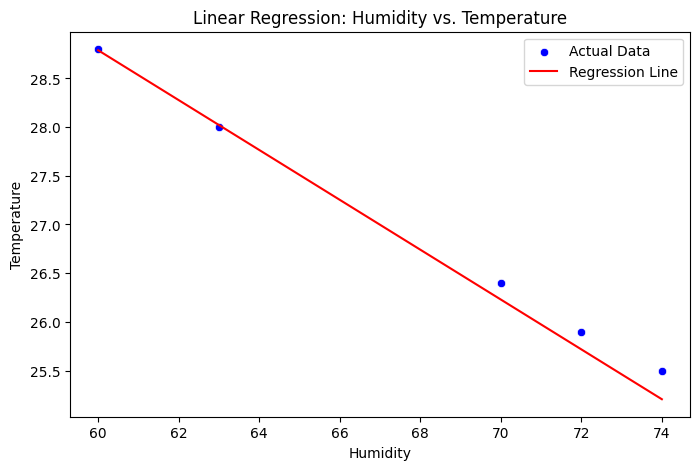

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load Data
df = pd.read_csv('data.csv')

# Define Features (X) and Target (Y)
X = df[['humidity']]  # Choosing humidity as an example feature
Y = df['temp_c']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Temperature
y_pred = model.predict(X_test)

# Scatter Plot with Regression Line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['humidity'], y=y_test, color='blue', label='Actual Data')
sns.lineplot(x=X_test['humidity'], y=y_pred, color='red', label='Regression Line')

# Labels & Title
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Linear Regression: Humidity vs. Temperature')
plt.legend()
plt.show()


Model Performance:
Mean Absolute Error (MAE): 0.4936585811645767
Root Mean Squared Error (RMSE): 0.5675852460721561


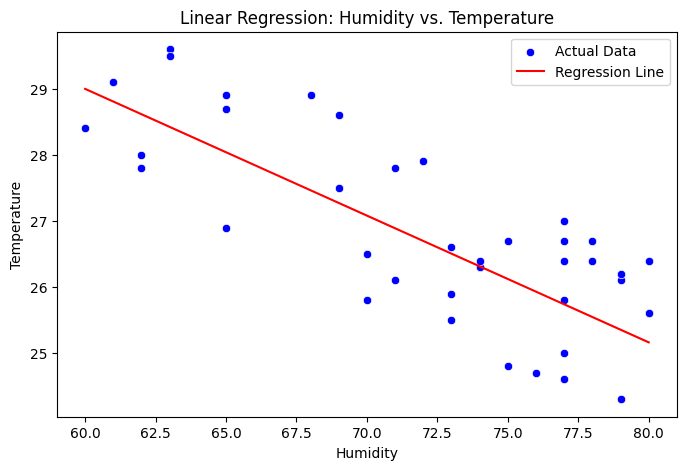

In [72]:
import requests
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define API base URL
base_url = "http://api.weatherapi.com"

def get_past_7_days_weather(query: str = ""):
    """
    Fetches past 7 days of weather data from the Weather API.
    
    Args:
        query (str): Location name (e.g., "Chennai").

    Returns:
        dict: JSON response containing historical weather data.
    """
    today = datetime.today().strftime("%Y-%m-%d")
    seven_days_back = (datetime.today() - timedelta(days=7)).strftime("%Y-%m-%d")
    
    params = {
        "key": os.environ.get("Weather_API_key"),  # API Key from environment variable
        "q": query,  # Location
        "dt": seven_days_back,  # Start date
        "end_dt": today  # End date
    }
    
    # API request
    response = requests.get(f"{base_url}/v1/history.json", params=params)
    response.raise_for_status()  # Raise error if request fails
    
    return response.json()

def get_df(jsondata):
    """
    Extracts required weather data from JSON and converts it into a Pandas DataFrame.

    Args:
        jsondata (dict): JSON response from API.

    Returns:
        pd.DataFrame: Processed data with selected features.
    """
    features = ['hour', 'day', 'month', 'humidity', 'pressure_mb', 'cloud']
    target = "temp_c"
    data = []

    for forecastday in jsondata.get("forecast", {}).get("forecastday", []):
        for hour in forecastday.get("hour", []):  # Ensure we access "hour" correctly
            dt = datetime.strptime(hour.get('time'), "%Y-%m-%d %H:%M")
            
            # Creating a new dictionary for structured data
            hour_data = {
                "hour": dt.hour,
                "day": dt.day,
                "month": dt.month,
                "humidity": hour.get("humidity"),
                "pressure_mb": hour.get("pressure_mb"),
                "cloud": hour.get("cloud"),
                "temp_c": hour.get("temp_c")
            }
            data.append(hour_data)

    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data)
    
    return df

# Fetch and store weather data for Chennai
data = get_past_7_days_weather("Chennai")

# Save JSON data to a file
filename = "data.json"
with open(filename, "w") as file:
    json.dump(data, file, indent=4)  # Properly format JSON

# Load JSON data from file
filepath = "data.json"
jsondata = json.load(open(filepath))

# Convert JSON data to DataFrame
df = get_df(jsondata)

# Save DataFrame as CSV
df.to_csv("data.csv", index=False)

# Load CSV for analysis
df = pd.read_csv("data.csv")

# Define Features (X) and Target (Y)
X = df[['hour', 'day', 'month', 'humidity', 'pressure_mb', 'cloud']].values
Y = df['temp_c'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# --- Visualization ---

# Select a single feature ('humidity') for visualization
X = df[['humidity']]  
Y = df['temp_c']

# Split Data Again for Visualization
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Linear Regression Model Again
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Temperature
y_pred = model.predict(X_test)

# Scatter Plot with Regression Line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['humidity'], y=y_test, color='blue', label='Actual Data')
sns.lineplot(x=X_test['humidity'], y=y_pred, color='red', label='Regression Line')

# Labels & Title
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Linear Regression: Humidity vs. Temperature')
plt.legend()
plt.show()


In [ ]:
import requests
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define API base URL
base_url = "http://api.weatherapi.com"

def get_past_7_days_weather(location: str):
    today = datetime.today().strftime("%Y-%m-%d")
    seven_days_back = (datetime.today() - timedelta(days=7)).strftime("%Y-%m-%d")
    
    params = {
        "key": os.environ.get("Weather_API_key"),
        "q": location,
        "dt": seven_days_back,
        "end_dt": today
    }
    
    response = requests.get(f"{base_url}/v1/history.json", params=params)
    response.raise_for_status()
    
    return response.json()

def get_df(jsondata):
    features = ['hour', 'day', 'month', 'humidity', 'pressure_mb', 'cloud']
    target = "temp_c"
    data = []

    for forecastday in jsondata.get("forecast", {}).get("forecastday", []):
        for hour in forecastday.get("hour", []):
            dt = datetime.strptime(hour.get('time'), "%Y-%m-%d %H:%M")
            data.append({
                "hour": dt.hour,
                "day": dt.day,
                "month": dt.month,
                "humidity": hour.get("humidity"),
                "pressure_mb": hour.get("pressure_mb"),
                "cloud": hour.get("cloud"),
                "temp_c": hour.get("temp_c")
            })
    
    return pd.DataFrame(data)

def train_model(df):
    X = df[['hour', 'day', 'month', 'humidity', 'pressure_mb', 'cloud']].values
    Y = df['temp_c'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return model

def predict_temperature(location: str, date: str):
    jsondata = get_past_7_days_weather(location)
    df = get_df(jsondata)
    model = train_model(df)
    
    dt = datetime.strptime(date, "%Y-%m-%d")
    prediction_data = []
    for hour in range(24):
        prediction_data.append([hour, dt.day, dt.month, df['humidity'].mean(), df['pressure_mb'].mean(), df['cloud'].mean()])
    
    prediction_data = np.array(prediction_data)
    predictions = model.predict(prediction_data)
    
    avg_temp = np.mean(predictions)
    print(f"Predicted average temperature for {location} on {date}: {avg_temp:.2f}°C")
    
    return avg_temp

# Example usage
location = "Chennai"
date = (datetime.today() + timedelta(days=1)).strftime("%Y-%m-%d")
predict_temperature(location, date)


Predicted average temperature for Chennai on 2025-03-18: 29.36°C


29.35723563434718